In [ ]:
'''
# install required system dependencies
!apt-get install -y xvfb x11-utils
# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*
!pip install pyvirtualdisplay==0.2.*
'''

In [ ]:
''' Installing cuda without openGL on Debian 9 stretch. Basically Xvfb doesn't play nice with Nvidia's openGL installation, 
so you have to install it with --no-opengl-libs flags. First, just use the driver recommended at the start up screen of controlla-1-image 
with --no-opengl-libs flag added
    a. Follow unbuntu 16.04 (https://developer.nvidia.com/cuda-10.0-download-archive target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1604&target_type=runfilelocal)
        1. wget https://developer.nvidia.com/compute/cuda/10.0/Prod/local_installers/cuda_10.0.130_410.48_linux.run
        2. sudo sh cuda_10.0.130_410.48_linux.run --no-opengl-libs
    b. Adapt script from https://gist.github.com/8enmann/931ec2a9dc45fde871d2139a7d1f2d78 to remove old install
        1. sudo apt-get --purge remove nvidia-*
        2. sudo nvidia-uninstall
    c. Please make sure that PATH contains /usr/local/cuda/bin and LD_LIBRARY_PATH contains /usr/local/cuda/lib64
        1.   export PATH=$PATH:/usr/local/cuda-10.0/bin
        2.   export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda-10.0/lib64
    d. Extra things needed to be moved to the right dirs (https://docs.nvidia.com/deeplearning/cudnn/install-guide/index.html section 2.3 to get tar file for Nvidia toolkit)
        1. sudo cp cuda/include/cudnn*.h /usr/local/cuda/include 
        2. sudo cp -P cuda/lib64/libcudnn* /usr/local/cuda/lib64 
        3. sudo chmod a+r /usr/local/cuda/include/cudnn*.h /usr/local/cuda/lib64/libcudnn*
'''

In [7]:
import deluca
import gym
import gnwrapper
import jax
from deluca.envs import Reacher
from deluca.agents import ILQR
from deluca.agents._ilqr import rollout
from pyvirtualdisplay import Display

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    # plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.title("%s | Step: %d %s" % (type(env).__name__,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [4]:
def loop(context, i):
    env, agent = context
    control = agent(env.state)
    _, reward, _, _ = env.step(control)
    show_state(env, step=i)
    return (env, agent), reward

In [9]:
# ILQR
ALPHA = 1.0
env_true, env_sim = Reacher(-10.), Reacher()
print('-------------- ilqr_sim ----------------')
ilqr_sim = ILQR()
ilqr_sim.train(env_sim, 5, alpha=ALPHA)
print('----------- compute zero_cost -----------')
env_ZEROCOST = Reacher(-10.)
_,_,ZEROCOST = rollout(env_ZEROCOST, ilqr_sim.U, ilqr_sim.k, ilqr_sim.K, ilqr_sim.X)
print('ZEROCOST:' + str(ZEROCOST))
print('-------------- ilqr_true ----------------')
agent = ILQR()
agent.train(env_true, 10, ilqr_sim.U, alpha=ALPHA)

-------------- ilqr_sim ----------------
initial cost:29.766178
(iLQR): t = 0, r = 2, c = 11.271796226501465, alpha = 1.100000023841858
(iLQR): t = 1, r = 3, c = 11.118474960327148, alpha = 1.2100000381469727
(iLQR): t = 2, r = 4, c = 11.112727165222168, alpha = 1.3310000896453857
(iLQR): t = 3, r = 6, c = 11.112680435180664, alpha = 1.3310000896453857
(iLQR): t = 4, r = 7, c = 11.112521171569824, alpha = 1.4641001224517822
----------- compute zero_cost -----------
ZEROCOST:2413.7056
-------------- ilqr_true ----------------
initial cost:1055.0634
(iLQR): t = 0, r = 2, c = 941.4541015625, alpha = 1.100000023841858
(iLQR): t = 1, r = 3, c = 935.1439208984375, alpha = 1.2100000381469727
(iLQR): t = 2, r = 4, c = 924.70703125, alpha = 1.3310000896453857
(iLQR): t = 3, r = 5, c = 881.9180297851562, alpha = 1.4641001224517822
(iLQR): t = 4, r = 9, c = 839.0318603515625, alpha = 0.683013379573822
(iLQR): t = 5, r = 10, c = 820.6473388671875, alpha = 0.7513146996498108
(iLQR): t = 6, r = 11, 

(DeviceArray(761.0863, dtype=float32),
 ['(iLQR): t = 0, r = 2, c = 941.4541015625, alpha = 1.100000023841858',
  '(iLQR): t = 1, r = 3, c = 935.1439208984375, alpha = 1.2100000381469727',
  '(iLQR): t = 2, r = 4, c = 924.70703125, alpha = 1.3310000896453857',
  '(iLQR): t = 3, r = 5, c = 881.9180297851562, alpha = 1.4641001224517822',
  '(iLQR): t = 4, r = 9, c = 839.0318603515625, alpha = 0.683013379573822',
  '(iLQR): t = 5, r = 10, c = 820.6473388671875, alpha = 0.7513146996498108',
  '(iLQR): t = 6, r = 11, c = 811.3817749023438, alpha = 0.8264461755752563',
  '(iLQR): t = 7, r = 14, c = 791.3921508789062, alpha = 0.62092125415802',
  '(iLQR): t = 8, r = 15, c = 773.3284301757812, alpha = 0.683013379573822',
  '(iLQR): t = 9, r = 16, c = 761.0863037109375, alpha = 0.7513146996498108'])

In [10]:
# needed to connect to "fake" monitor (not actually used)
display_dummy = Display(visible=False, size=(1400, 900))
display_dummy.start()

------------------------------------------
FullArgSpec(args=['self', 'args', 'bufsize', 'executable', 'stdin', 'stdout', 'stderr', 'preexec_fn', 'close_fds', 'shell', 'cwd', 'env', 'universal_newlines', 'startupinfo', 'creationflags', 'restore_signals', 'start_new_session', 'pass_fds'], varargs=None, varkw=None, defaults=(-1, None, None, None, None, None, True, False, None, None, None, None, 0, True, False, ()), kwonlyargs=['encoding', 'errors', 'text'], kwonlydefaults={'encoding': None, 'errors': None, 'text': None}, annotations={})
self.cwd:None
self.env:None
cmd:['Xvfb', '-help']
3
7
------------------------------------------
FullArgSpec(args=['self', 'args', 'bufsize', 'executable', 'stdin', 'stdout', 'stderr', 'preexec_fn', 'close_fds', 'shell', 'cwd', 'env', 'universal_newlines', 'startupinfo', 'creationflags', 'restore_signals', 'start_new_session', 'pass_fds'], varargs=None, varkw=None, defaults=(-1, None, None, None, None, None, True, False, None, None, None, None, 0, True, Fa

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1307'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1307'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

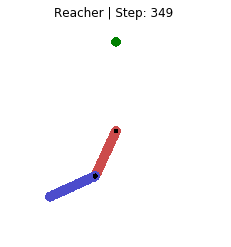

reward_forloop = 1523.2848


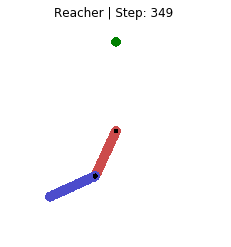

In [15]:
# for loop version
T = 350
env = Reacher(-10.)
print(env.reset())
reward = 0
for i in range(T):
    (env, agent), r = loop((env, agent), i)
    reward += r
# env.reset()
# env.display()
reward_forloop = reward
print('reward_forloop = ' + str(reward_forloop))